In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.axisbelow'] = True
import sys
import glob
import os
from scipy.ndimage import label, generate_binary_structure, gaussian_filter1d
from skimage import io, color, measure, img_as_float, img_as_uint, img_as_ubyte, exposure, morphology, feature
from skimage.segmentation import clear_border, felzenszwalb, mark_boundaries
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.filters import hessian, frangi, sobel, meijering, sato, threshold_multiotsu, scharr, try_all_threshold, threshold_otsu
from skimage.util import invert
from os.path import join, exists
import os
from scipy.signal import welch, correlate
from scipy.stats import pearsonr, linregress
from scipy.interpolate import PchipInterpolator
from scipy.ndimage import gaussian_filter1d
from PIL import Image
Image.MAX_IMAGE_PIXELS = 2000000000
!{sys.executable} -m pip install xlrd

In [2]:
# Plot Linescan with gray values on top
NEEM_path = "/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/LineScan/NEEM/VisStrat/0_All_Bags_sorted/0_all/"
px_to_m = 1/20000

bag = 3658
n = 20
if bag<3656 or bag>3664:
    n = 11
file_name = "{}_pass{}_1200.bmp".format(bag,n)
img_path = join(NEEM_path,file_name)
img = io.imread(img_path)
img = img[280:-280,800:1500]
img = np.flip(img.T,axis=1)
img.shape

(700, 21803)

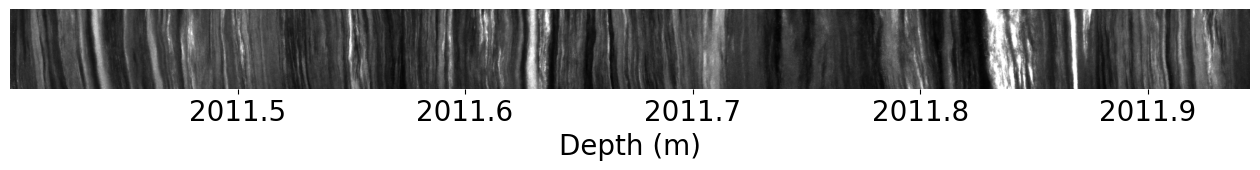

In [10]:
img1 = img[:,:int(img.shape[1]/2)]

fig, ax = plt.subplots(1, 1,figsize=(16,3),sharex=True)
ax.imshow(img1, cmap="gray")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Depth (m)",fontsize=20)

ax.set_xticks([0.1/px_to_m,0.2/px_to_m,0.3/px_to_m,0.4/px_to_m,0.5/px_to_m])
ax.set_xticklabels([round(3657*0.55+0.1,1),round(3657*0.55+0.2,1),round(3657*0.55+0.3,1),round(3657*0.55+0.4,1),round(3657*0.55+0.5,1)])
#ax.set_xticks([])
ax.set_yticks([])
fig.savefig("Plots/28_Linescan_3658.png",dpi=100)
fig.show()

0.005